In [1]:

#importing the libraray 
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt 

In [3]:
#load the data 
dataset =pd.read_csv('ICalls_dataset.csv')
X=dataset

C:\Users\yasha_000\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3063: DtypeWarning: Columns (4) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


#look and feel of the data 

In [6]:
dataset.info()
#it give alll the distription of the data like null values,number of data and data type 


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99999 entries, 0 to 99998
Data columns (total 23 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   CALL_ID                 99999 non-null  int64  
 1   START_TIMESTAMP         99999 non-null  object 
 2   CALL_DURATION_SEC       99999 non-null  int64  
 3   CALLING_NUMBER_NOR      99999 non-null  object 
 4   CALLED_NUMBER_NOR       99999 non-null  object 
 5   RELEASE_CALSE_ID        99999 non-null  int64  
 6   IN_SWITCH_ID            99999 non-null  int64  
 7   IN_TRUNK_ID             99999 non-null  int64  
 8   IN_ACCOUNT_ID           99999 non-null  int64  
 9   IN_SERVICE_LEVEL_ID     99999 non-null  int64  
 10  IN_SERVICE_ID           99999 non-null  int64  
 11  OUT_SWITCH_ID           99999 non-null  int64  
 12  OUT_TRUNK_ID            99999 non-null  int64  
 13  OUT_ACCOUNT_ID          99999 non-null  int64  
 14  OUT_SERVICE_LEVEL_ID    99999 non-null

In [5]:

dataset.describe()
#it give all the statistical value of the data mean ,std,max and disrutustion of the data 

,CALL_ID,CALL_DURATION_SEC,RELEASE_CALSE_ID,IN_SWITCH_ID,IN_TRUNK_ID,IN_ACCOUNT_ID,IN_SERVICE_LEVEL_ID,IN_SERVICE_ID,OUT_SWITCH_ID,OUT_TRUNK_ID,OUT_ACCOUNT_ID,OUT_SERVICE_LEVEL_ID,OUT_SERVICE_ID,ROUTING_CLASS_ID,ROUTING_DESTINATION_ID,ROUTING_COUNTRY_ID,ORIG_COUNTRY_ID,ANSWERED,COST,REVENUE
count,9.999900e+04,99999.000000,99999.000000,99999.0,99999.000000,99999.000000,99999.000000,99999.0,99999.0,99999.000000,99999.000000,99999.0,99999.000000,99999.000000,99999.000000,99999.000000,99999.000000,99999.000000,99999.000000,99999.000000
mean,1.000284e+18,48.458295,113.165142,3.0,3160.778828,261.777788,4.906059,1.0,3.0,2846.342773,223.084791,0.0,0.945849,4.712877,25641.202932,133.344183,147.244782,0.301993,0.044938,0.048910
std,7.671378e+09,285.489648,59.675143,0.0,786.210202,95.391538,2.480387,0.0,0.0,836.588332,74.992806,0.0,0.226316,2.650729,67733.326216,63.545003,70.959032,0.459125,0.230755,0.255000
min,1.000284e+18,0.000000,15.000000,3.0,354.000000,95.000000,0.000000,1.0,3.0,354.000000,94.000000,0.0,0.000000,0.000000,2.000000,2.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000284e+18,0.000000,25.000000,3.0,2979.000000,204.000000,3.000000,1.0,3.0,2738.000000,198.000000,0.0,1.000000,3.000000,782.000000,81.000000,103.000000,0.000000,0.000000,0.000000
50%,1.000284e+18,0.000000,144.000000,3.0,3274.000000,253.000000,4.000000,1.0,3.0,2999.000000,221.000000,0.0,1.000000,3.000000,1079.000000,146.000000,147.000000,0.000000,0.000000,0.000000
75%,1.000284e+18,4.000000,148.000000,3.0,3754.000000,368.000000,8.000000,1.0,3.0,3305.000000,234.000000,0.0,1.000000,8.000000,1791.000000,178.000000,228.000000,1.000000,0.000525,0.000833
max,1.000284e+18,9010.000000,255.000000,3.0,3948.000000,396.000000,8.000000,1.0,3.0,3947.000000,396.000000,0.0,1.000000,8.000000,483676.000000,280.000000,280.000000,1.000000,16.592958,17.321500


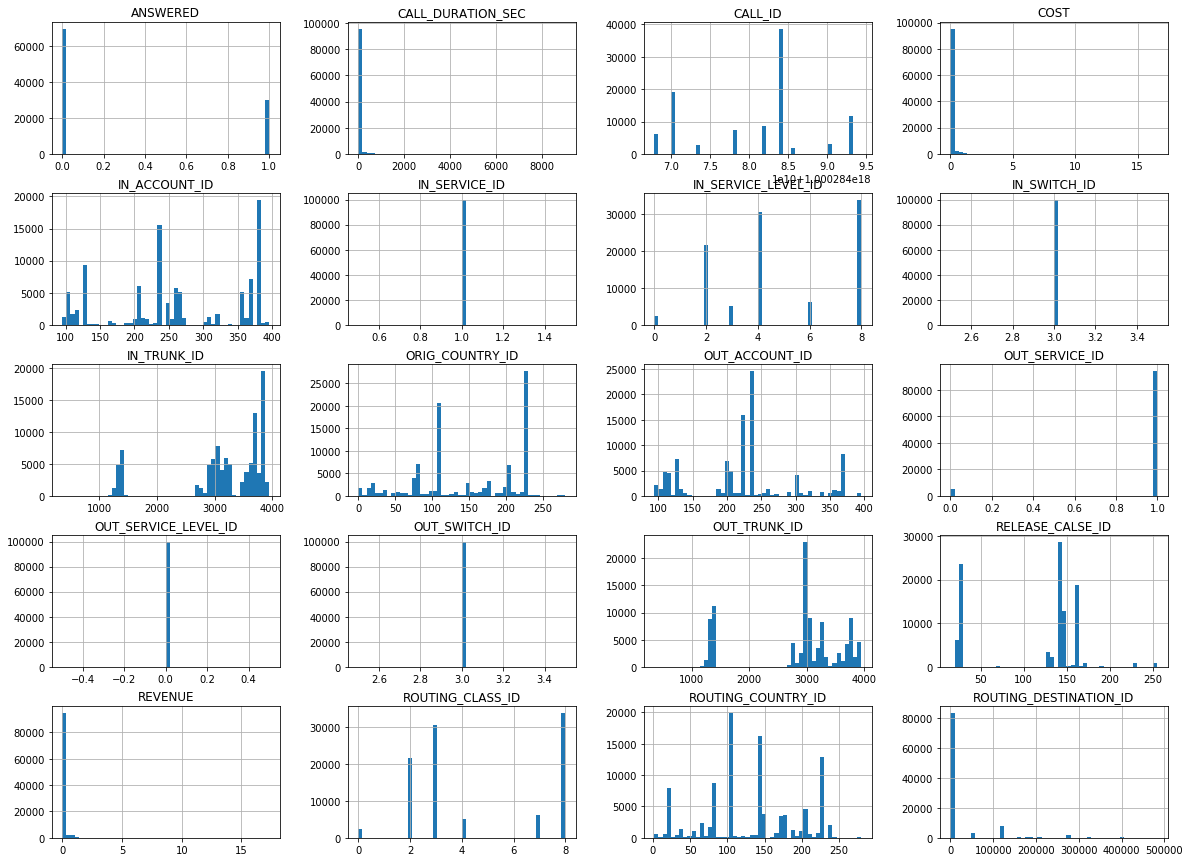

In [7]:

dataset.hist(bins=50, figsize=(20,15))
plt.show()
#Best why to understand data corelation is graph in this representing the graph give us all inside 

#As i start finding the anomoly dectection i find the data is unsupervised so the best way to start is the clustring the data
#for that i find the no. of cluster by implemeting elbow graph with the help of WCSS
#befor that there is some data preprocessing is needed 

In [9]:
X=dataset.drop(['START_TIMESTAMP','CALLING_NUMBER_NOR','CALLED_NUMBER_NOR'], axis=1)
X=X.astype(float)
#Algorithm can take the Object value so drop them 

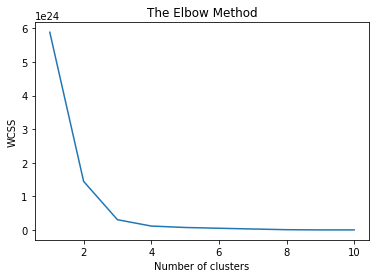

In [10]:
# Using the elbow method to find the optimal number of clusters
from sklearn.cluster import KMeans
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 42)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)
plt.plot(range(1, 11), wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

#Graph represent the no. of  cluster that is 3 so  calls are dividede into 3 no. of clusters

In [11]:

# Fitting K-Means to the dataset
kmeans = KMeans(n_clusters = 3, init = 'k-means++', random_state = 42)
y_kmeans = kmeans.fit_predict(X)
y=y_kmeans.astype('float64')

#After performing the clustering its perfect to find the no, if clusters 

In [12]:
y

array([1., 1., 1., ..., 0., 0., 0.])

In [13]:
#The join the data to make the independent and dependent variable 
group=pd.DataFrame(y) 
dataset1=pd.concat([group,dataset],axis=1)

In [14]:
dataset1.head()

,0,CALL_ID,START_TIMESTAMP,CALL_DURATION_SEC,CALLING_NUMBER_NOR,CALLED_NUMBER_NOR,RELEASE_CALSE_ID,IN_SWITCH_ID,IN_TRUNK_ID,IN_ACCOUNT_ID,...,OUT_ACCOUNT_ID,OUT_SERVICE_LEVEL_ID,OUT_SERVICE_ID,ROUTING_CLASS_ID,ROUTING_DESTINATION_ID,ROUTING_COUNTRY_ID,ORIG_COUNTRY_ID,ANSWERED,COST,REVENUE
0,1.0,1000284067810012905,02-02-2020 0:28:10,123,1304815045520,1063401614250,144,3,3814,381,...,221,0,1,8,1067,146,241,1,0.681010,0.682035
1,1.0,1000284067810012912,02-02-2020 0:30:13,1,77186605110,14589732215,144,3,3170,204,...,190,0,1,8,272224,67,229,1,0.002583,0.002583
2,1.0,1000284067810009861,02-02-2020 0:09:18,33,2239852722450,2239769672380,144,3,3170,204,...,130,0,1,4,1798,228,228,1,0.003025,0.003025
3,1.0,1000284067810012939,02-02-2020 0:29:47,43,24578679921860,24578661100030,144,3,3617,249,...,256,0,1,2,540,80,80,1,0.007102,0.000000
4,1.0,1000284067810012946,02-02-2020 0:28:51,101,1966743879300,2238910138380,144,3,1353,234,...,370,0,1,2,1778,228,107,1,0.013467,0.012120


##Now we have the data set that have the dependent and independent variable so we can perfrom the supervised techinique 
#Now working on the pipeline of the data science 

1)Data Analysis
2)Feature Engineering
3)Feature Selection
4)Model Building
5)Model Deployment

In Data Analysis We will Analyze To Find out the below stuff
Missing Values
All The Numerical Variables
Distribution of the Numerical Variables
Categorical Variables
Cardinality of Categorical Variables
Outliers
Relationship between independent and dependent feature(Cluster)

In [16]:

#Missing value 
## Here we will check the percentage of nan values present in each feature
## 1 -step make the list of features which has missing values
features_with_na=[features for features in dataset1.columns if dataset1[features].isnull().sum()>1]
## 2- step print the feature name and the percentage of missing values
for feature in features_with_na:
    print(feature, np.round(dataset1[feature].isnull().mean(), 4),  ' % missing values')

#so there is no null values in the data set 

In [19]:
#Numerical variables 
    # list of numerical variables
numerical_features = [feature for feature in dataset1.columns if dataset1[feature].dtypes != 'O']

print('Number of numerical variables: ', len(numerical_features))

Number of numerical variables:  21


In [20]:

# visualise the numerical variables
dataset1[numerical_features].head()

,0,CALL_ID,CALL_DURATION_SEC,RELEASE_CALSE_ID,IN_SWITCH_ID,IN_TRUNK_ID,IN_ACCOUNT_ID,IN_SERVICE_LEVEL_ID,IN_SERVICE_ID,OUT_SWITCH_ID,...,OUT_ACCOUNT_ID,OUT_SERVICE_LEVEL_ID,OUT_SERVICE_ID,ROUTING_CLASS_ID,ROUTING_DESTINATION_ID,ROUTING_COUNTRY_ID,ORIG_COUNTRY_ID,ANSWERED,COST,REVENUE
0,1.0,1000284067810012905,123,144,3,3814,381,8,1,3,...,221,0,1,8,1067,146,241,1,0.681010,0.682035
1,1.0,1000284067810012912,1,144,3,3170,204,8,1,3,...,190,0,1,8,272224,67,229,1,0.002583,0.002583
2,1.0,1000284067810009861,33,144,3,3170,204,3,1,3,...,130,0,1,4,1798,228,228,1,0.003025,0.003025
3,1.0,1000284067810012939,43,144,3,3617,249,2,1,3,...,256,0,1,2,540,80,80,1,0.007102,0.000000
4,1.0,1000284067810012946,101,144,3,1353,234,2,1,3,...,370,0,1,2,1778,228,107,1,0.013467,0.012120


In [21]:

### Numerical variables are usually of 2 type
## 1. Continous variable and Discrete Variables

discrete_feature=[feature for feature in numerical_features if len(dataset1[feature].unique())<25]
print("Discrete Variables Count: {}".format(len(discrete_feature)))

discrete_feature

dataset1[discrete_feature].head()

Discrete Variables Count: 9


,0,IN_SWITCH_ID,IN_SERVICE_LEVEL_ID,IN_SERVICE_ID,OUT_SWITCH_ID,OUT_SERVICE_LEVEL_ID,OUT_SERVICE_ID,ROUTING_CLASS_ID,ANSWERED
0,1.0,3,8,1,3,0,1,8,1
1,1.0,3,8,1,3,0,1,8,1
2,1.0,3,3,1,3,0,1,4,1
3,1.0,3,2,1,3,0,1,2,1
4,1.0,3,2,1,3,0,1,2,1


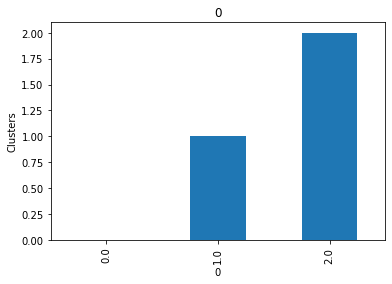

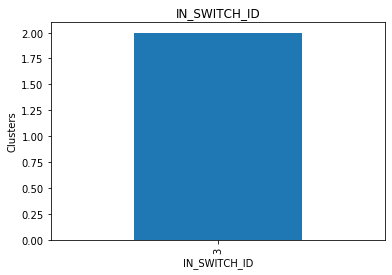

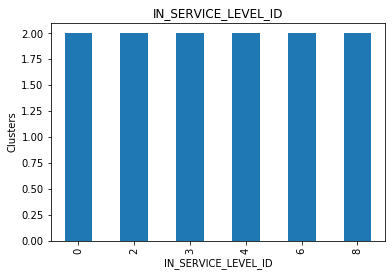

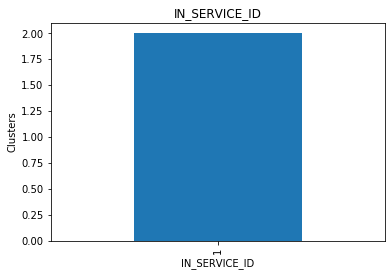

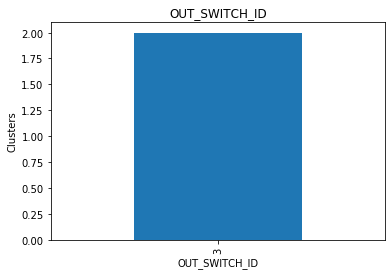

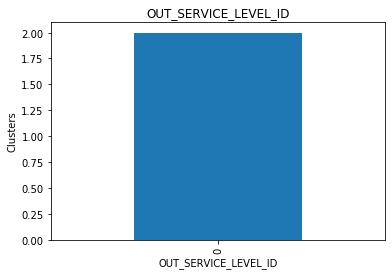

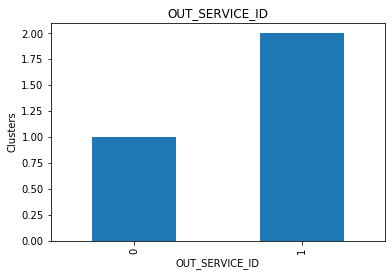

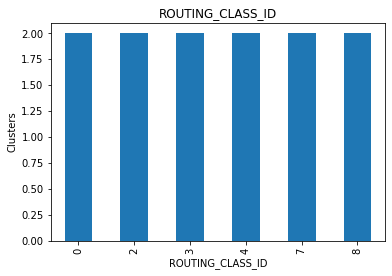

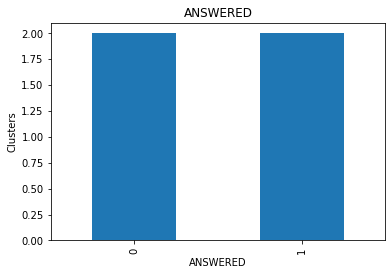

In [22]:
## Lets Find the realtionship between them and clusters

for feature in discrete_feature:
    data=dataset1.copy()
    data.groupby(feature)[0].median().plot.bar()
    plt.xlabel(feature)
    plt.ylabel('Clusters')
    plt.title(feature)
    plt.show()
    

#after analysng all the fingure its found that all the calles that are in the cluster 2 is detected to the alamoly

In [23]:

#continuous variable 
continuous_feature=[feature for feature in numerical_features if feature not in discrete_feature]
print("Continuous feature Count {}".format(len(continuous_feature)))

Continuous feature Count 12


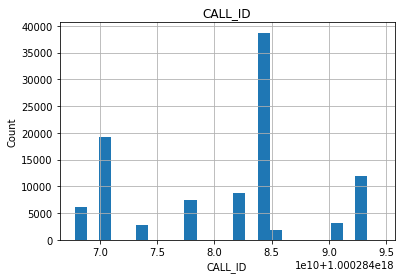

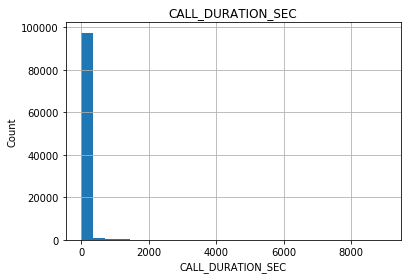

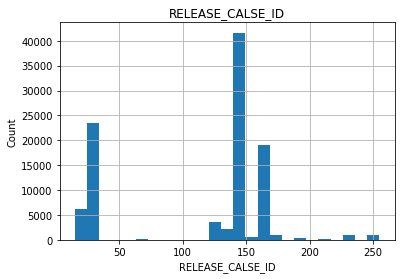

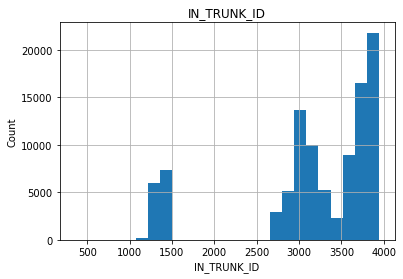

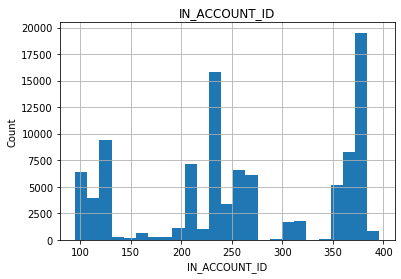

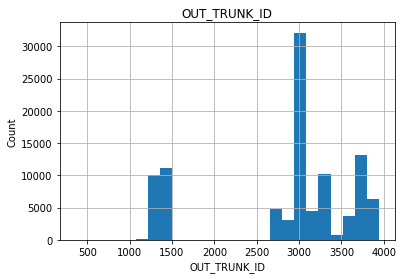

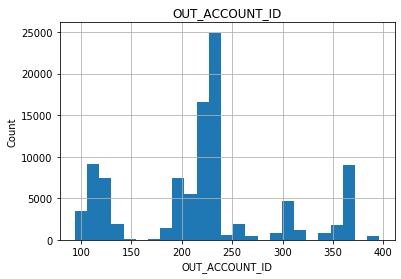

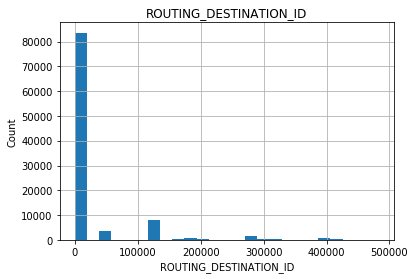

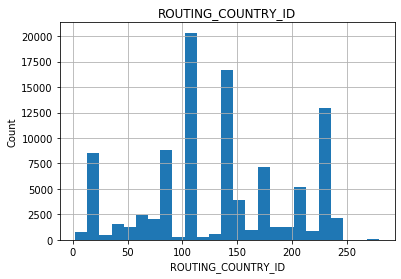

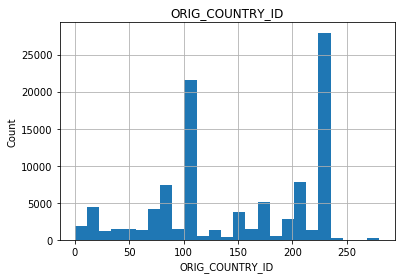

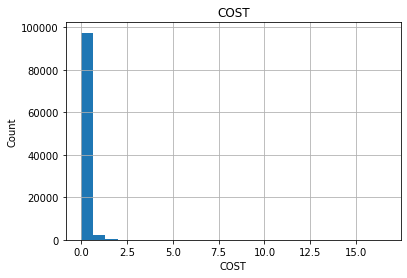

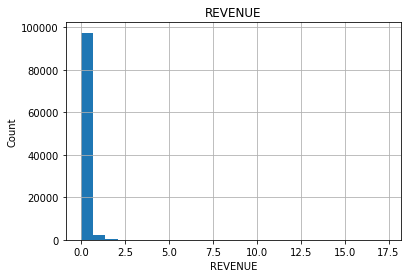

In [24]:

## Lets analyse the continuous values by creating histograms to understand the distribution

for feature in continuous_feature:
    data=dataset1.copy()
    data[feature].hist(bins=25)
    plt.xlabel(feature)
    plt.ylabel("Count")
    plt.title(feature)
    plt.show()


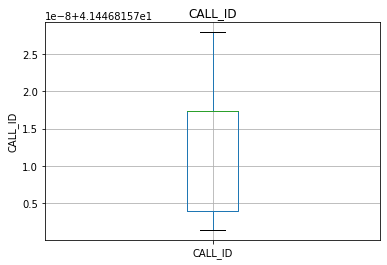

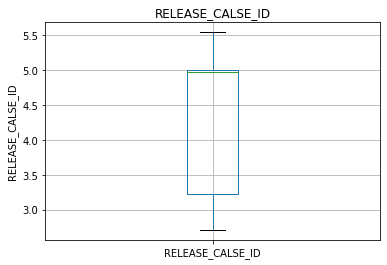

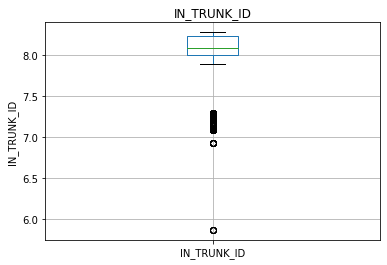

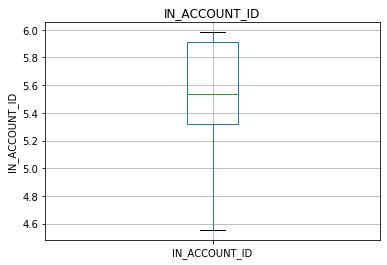

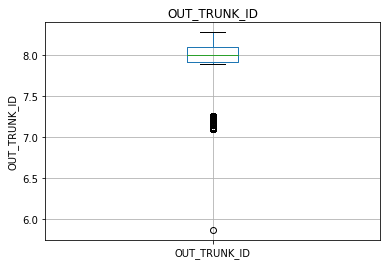

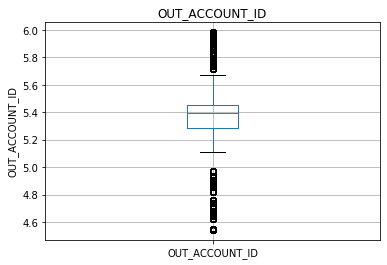

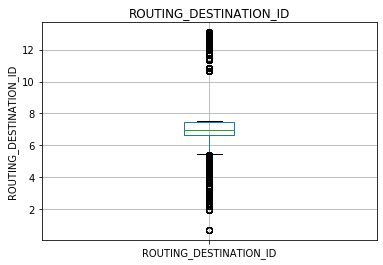

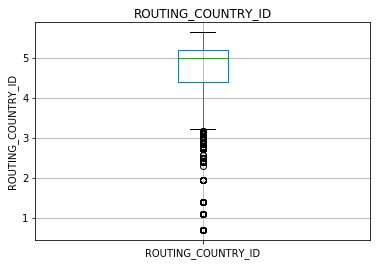

In [25]:

#finding the outlier 
    
for feature in continuous_feature:
    data=dataset1.copy()
    if 0 in data[feature].unique():
        pass
    else:
        data[feature]=np.log(data[feature])
        data.boxplot(column=feature)
        plt.ylabel(feature)
        plt.title(feature)
        plt.show()
        
#After analysis we found that there is many outliner in the data or we can say we are searching for them to be present in the data 
#we will work on the outliner in the feature engering 

In [26]:

#catagorical data 

categorical_features=[feature for feature in dataset1.columns if data[feature].dtypes=='O']
categorical_features

dataset1[categorical_features].head()

,START_TIMESTAMP,CALLING_NUMBER_NOR,CALLED_NUMBER_NOR
0,02-02-2020 0:28:10,1304815045520,1063401614250
1,02-02-2020 0:30:13,77186605110,14589732215
2,02-02-2020 0:09:18,2239852722450,2239769672380
3,02-02-2020 0:29:47,24578679921860,24578661100030
4,02-02-2020 0:28:51,1966743879300,2238910138380


In [27]:
#finding the no. of fields in catagorical data 
for feature in categorical_features:
    print('The feature is {} and number of categories are {}'.format(feature,len(dataset1[feature].unique())))

#we can not do anhything of these feature bcoz of the no. of categories 

The feature is START_TIMESTAMP and number of categories are 16122
The feature is CALLING_NUMBER_NOR and number of categories are 47694
The feature is CALLED_NUMBER_NOR and number of categories are 60352


We will be performing all the below steps in Feature Engineering

Missing values
Temporal variables

1)Missing Values in this we dont not have any missing value so that we can skip this part of feature engineering 

2)Temporal Variables ( Time Variables) as we understand that it is also not effecting us in the anlysis 

In [29]:
#implemengting the logistic regrssion model to work on the multi-class classification problem 
X=dataset1.drop(['START_TIMESTAMP','CALLING_NUMBER_NOR','CALLED_NUMBER_NOR',0], axis=1)
y = dataset1.iloc[:,0].values

In [30]:

# Splitting the dataset into the Training set and Test set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.40, random_state = 0)

In [31]:

# Feature Scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [32]:

# Fitting Logistic Regression to the Training set
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression(random_state = 0)
classifier.fit(X_train, y_train)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=0, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [36]:

# Predicting the Test set results
y_pred = classifier.predict(X_test)
y_pred

array([1., 2., 2., ..., 2., 0., 2.])

In [37]:

# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
cm

array([[ 5998,     0,     0],
       [    0, 11294,     0],
       [    0,     0, 22708]], dtype=int64)

In [ ]:
#Model is performing perfect because of the data set and we find that detectino in the model we are not able to perform the selection methods becoz of the domain specific 

We can perform the PCA for the dimentinal reduction and also make a neural network graph 